# Mô hình Logistic Regression
Mô hình này thường được sử dụng khi dữ liệu có thể phân chia được bởi một đường thẳng (tuyến tính).

## 1. Generate dữ liệu
Chúng ta tiến hành generate hai tập điểm đỏ và xanh ngẫu nhiên xung quanh các điểm xa nhau như [1, 5] và [5, 1] như hình dưới đây.

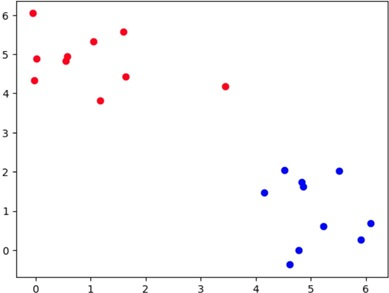

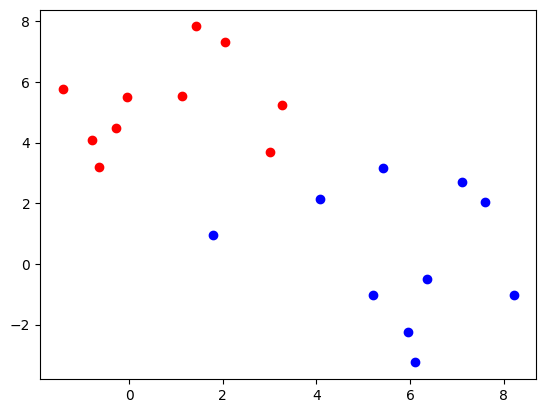

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_sample = 10
X_red = np.random.normal(0.0, 1.5, size=(n_sample, 2)) + np.array([1, 5])
X_blue = np.random.normal(0.0, 1.5, size=(n_sample, 2)) + np.array([5, 1])
plt.plot(X_red[:,0], X_red[:,1], 'ro')
plt.plot(X_blue[:,0], X_blue[:,1], 'bo')

X = np.concatenate((X_red, X_blue))
y = [0]*n_sample + [1]*n_sample

In [ ]:
y

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

## 2. BUILD MODEL (Cài đặt mô hình)

### Sử dụng mô hình Logistic Regression với Sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression()
logistic.fit(X, y)

LogisticRegression()

## Trực quan hoá mô hình với kết quả của thư viện Sklearn

In [ ]:
logistic.coef_

array([[ 0.76854679, -1.11015539]])

In [ ]:
logistic.intercept_

array([1.06195027])

Trực quan hóa mô hình

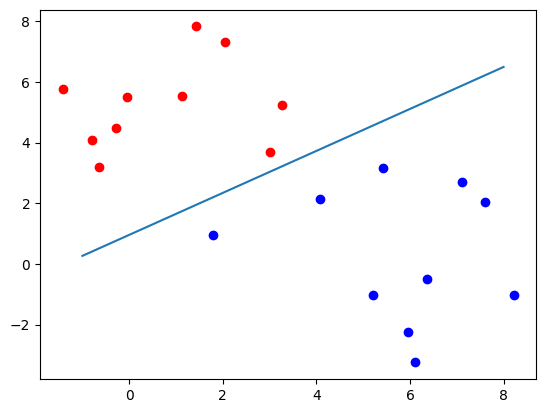

In [ ]:
# Vẽ lại các điểm huấn luyện
plt.plot(X_red[:,0], X_red[:,1], 'ro')
plt.plot(X_blue[:,0], X_blue[:,1], 'bo')

# Vẽ hàm mô hình
w1 = logistic.coef_[0][0]
w2 = logistic.coef_[0][1]
bias = logistic.intercept_[0]
def cal_x2 (x1):
  return (-w1*x1-bias) / w2

plt.plot([-1, 8], [cal_x2(-1), cal_x2(8)])

## 3. Đánh giá mô hình

In [ ]:
y_pred = logistic.predict(X)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_pred, y))

Accuracy:  1.0


In [ ]:
# Cách code tính accuracy khác (ko dùng for)
sum(y_pred == y) / len(y)

1.0

## Trường hợp dữ liệu có quan hệ Phi tuyến tính

### 1. Generate dữ liệu

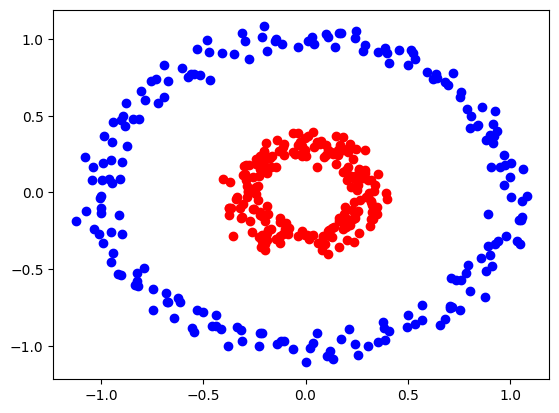

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.05)
# Visualize data
plt.plot(X[y==0,0],X[y==0,1], 'bo')
plt.plot(X[y==1,0],X[y==1,1], 'ro')

### 2. Build model

In [ ]:
logistic = LogisticRegression()
logistic.fit(X, y)

LogisticRegression()

### Trực quan hóa mô hình với dữ liệu phi tuyến

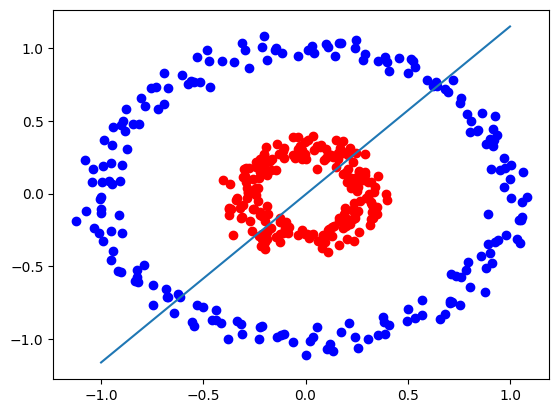

In [ ]:
# Visualize data
plt.plot(X[y==0,0],X[y==0,1], 'bo')
plt.plot(X[y==1,0],X[y==1,1], 'ro')

# Vẽ hàm mô hình
w1 = logistic.coef_[0][0]
w2 = logistic.coef_[0][1]
bias = logistic.intercept_[0]
def cal_x2 (x1):
  return (-w1*x1-bias) / w2

plt.plot([-1, 1], [cal_x2(-1), cal_x2(1)])

### 3. Tính accuracy

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = logistic.predict(X)
print('Accuracy: ', accuracy_score(y_pred, y))

Accuracy:  0.505


### Quay lại. Feature engineering

In [ ]:
X_new = np.hstack((X, (X[:,0]**2).reshape(X.shape[0],1)))
X_new = np.hstack((X_new, (X[:,1]**2).reshape(X.shape[0],1)))
X_new = np.hstack((X_new, (X[:,0]*X[:,1]).reshape(X.shape[0],1)))

X_new.shape
# 5 features: x1, x2, x1^2, x2^2, x1*x2

(400, 5)

### Build model

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_new, y)

LogisticRegression()

### Đánh giá lại mô hình

In [ ]:
y_pred = logistic.predict(X_new)
print('Accuracy: ', accuracy_score(y_pred, y))

Accuracy:  1.0


## Sử dụng mạng NEURAL NETWORK cho dữ liệu phi tuyến

In [ ]:
from sklearn.neural_network import MLPClassifier

params = { 'hidden_layer_sizes' : [10],
    'activation' : 'logistic',
    'solver' : 'adam',
    'alpha' : 0.0,
    'batch_size' : 100,
    'random_state' : 0,
    'tol' : 0.0001,
    'nesterovs_momentum' : False,
    'learning_rate' : 'constant',
    'learning_rate_init' : 0.01,
    'max_iter' : 100000,
    'shuffle' : True,
    'n_iter_no_change' : 50,
    'verbose' : False }

net = MLPClassifier(**params)

In [ ]:
# Dùng data cũ (raw data)
net.fit(X, y)

MLPClassifier(activation='logistic', alpha=0.0, batch_size=100,
              hidden_layer_sizes=[10], learning_rate_init=0.01, max_iter=100000,
              n_iter_no_change=50, nesterovs_momentum=False, random_state=0)

Đánh giá mô hình với Neural Network

In [ ]:
net.score(X, y)

1.0

In [ ]:
net.intercepts_

[array([ 1.65513296,  4.13589538, -5.05185077,  1.7962119 , -4.58190384,
         4.39075467, -4.15195159,  5.25673281, -2.89596012, -3.99262276]),
 array([-1.2590073])]

In [ ]:
net.coefs_

[array([[ 0.49311655,  4.2863562 ,  6.05535947,  0.47354855,  5.64831696,
         -1.39145746, -9.15182022,  8.22056879,  5.05944195, -7.95261942],
        [-0.21141496, -7.0325683 ,  7.9576292 , -0.19773972, -7.23716026,
         -9.60852536,  0.69047687,  5.56119321, -3.87611695, -1.87376065]]),
 array([[-1.62080258],
        [ 1.98017489],
        [-5.89257991],
        [-1.43181143],
        [-7.70956389],
        [ 4.17811111],
        [-4.32998215],
        [ 4.11691817],
        [-2.65119256],
        [-3.12064802]])]

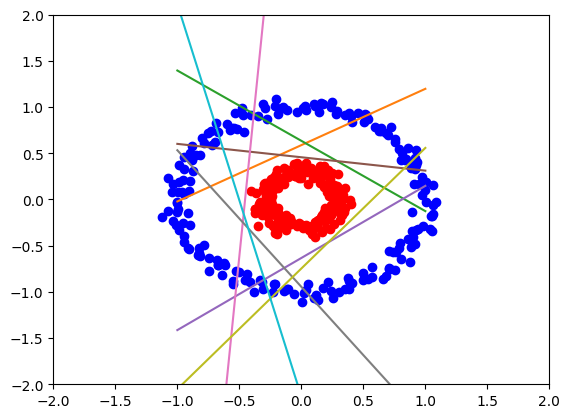

In [ ]:
# Visualize các nốt trong mạng Neural Network sau khi đã
# học được từ dữ liệu
plt.ylim(-2, 2)
plt.xlim(-2, 2)
plt.plot(X[y==0,0], X[y==0,1], 'bo')
plt.plot(X[y==1,0], X[y==1,1], 'ro')
# layer muốn visualize
layer = 0
for nodeID in range(len(net.intercepts_[0])):
  w1 = net.coefs_[layer][0][nodeID]
  w2 = net.coefs_[layer][1][nodeID]
  b = net.intercepts_[layer][nodeID]

  plt.plot([-1, 1], [-w1/w2*(-1)-b/w2, -w1/w2*(1)-b/w2])